**GROUP B PROJECT**

**PREDICTING APP SUCESS USING GOOGLE PLAYSTORE DATA SET**

**Group Members**

Cleve Mwebi

Vivian Mosomi

Mark Njagi

Peter Kinyanjui

Arnorld Mochama

Cynthia Chiuri

**BUSINESSS UNDERSTANDING**

Business Context:

The Google Play Store hosts a vast number of mobile applications across various categories. Understanding the factors that influence app ratings and user preferences is crucial for app developers, marketers, and stakeholders.

Stakeholders:

1)App Developers:They want to create successful apps that receive high ratings and downloads.

2)Marketers: They need insights to promote apps effectively.

3)Google Play Store: The platform aims to provide a positive user experience and attract more users.

Key Objectives

1. Predicting App Ratings: Develop a machine learning model to classify the ratings Installs of apps on the Google Play Store based on various features such as number of reviews, size, category, etc.

3. Identifying Factors Influencing App Popularity: Analyze the dataset to identify the key factors that contribute to the popularity of apps on the Google Play Store. This could involve determining which features have the strongest correlation with the number of installs or ratings.

4. Identifying Market Trends: Analyze the dataset to identify trends in the Google Play Store market, such as changes in user preferences over time, emerging app categories, or shifts in the distribution of app ratings. This could help app developers stay ahead of the curve and adapt their strategies accordingly.

**DATA UNDERSTANDING**

The link to the Kaggle data set:

https://www.kaggle.com/datasets/lava18/google-play-store-apps

The Google Play Store dataset contains information about numerous apps available on the platform, including app name, category, ratings, reviews, size, installs, type (is the app free or paid), price, content rating, genres, last app update, current app version and android version.

By analyzing this dataset, we can gain insights into the factors influencing app ratings and popularity, user engagement, and market trends within the Google Play Store ecosystem.

**Importing libraries needed**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
%matplotlib inline

import re
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from wordcloud import WordCloud, STOPWORDS
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import svm

### 1. Data Understanding

Loading the Data

In [2]:
#Loading the dataset
data = pd.read_csv("googleplaystore.csv")
data2 = data.copy()
data2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
# Shape of the data

data2.shape

(10841, 13)

In [4]:
# Info of the data

data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
# Statistics of the data

data2.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# First five rows of the data

data2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### 2. Data Cleaning

In [7]:
# Identifying the outlier row

data2[data2['Rating'] == 19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


The observation for the above row is that it has mismatched values which have to be shifted to the right

In [8]:
# Dropping the above row

data2 = data2[data2['Category'] != '1.9']

From data understanding, 2 columns which are category and genres have the same information. For the next step, we're deciding which column of the two, to use.

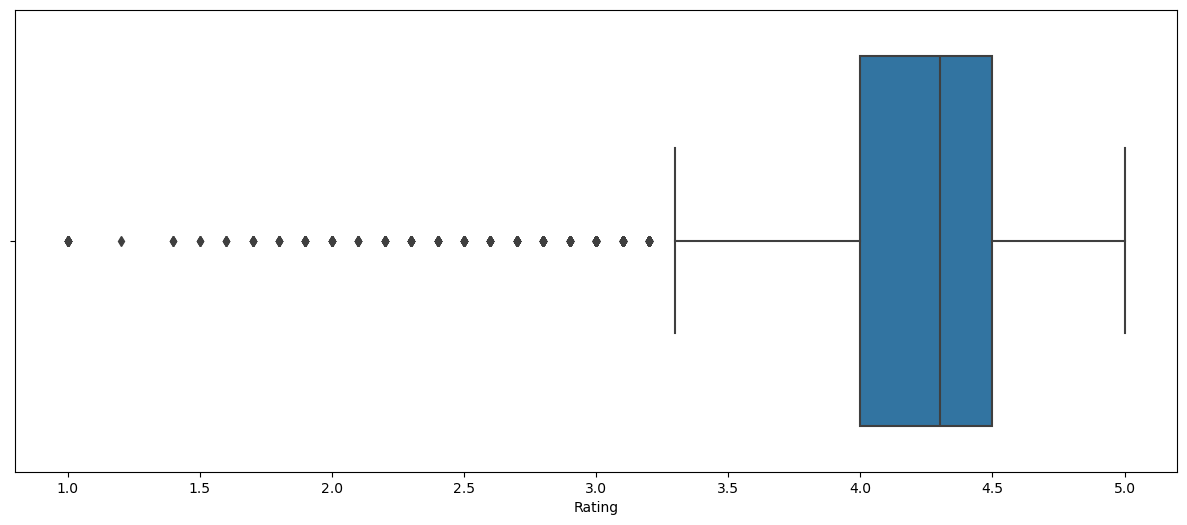

In [9]:
# Dealing with missing values in the ratings column

# Drawing a boxplot to visualise ratings column

plt.figure(figsize=(15,6))
sns.boxplot(x=data2['Rating']);

In [10]:
# Checking for null values

data2.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

For the rating column, we've decided to impute the missing values with median because it has outliers that is proved by the box plot above.

In [11]:
# Imputing the rating column with median

median_rating = data['Rating'].median()
data2['Rating'].fillna(median_rating,inplace=True)

The row with the missing value in the type column is this one below:

In [12]:
data2[data2['Type'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.3,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


From this, the Price column is 0 meaning the Type is Free and should not be missing

In [13]:
# Replacing NaN with Free in the type column

data2['Type'].fillna(value='Free',inplace=True)

In [14]:
data2.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [15]:
# Checking for duplicates

data2.loc[data2.duplicated(keep=False)].sort_values(by='App')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3063,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133833,34M,"10,000,000+",Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up
3055,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133833,34M,"10,000,000+",Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up
3103,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device
3202,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device


In [16]:
# Dropping duplicates 

data2.drop_duplicates(inplace=True)

In [17]:
data2.duplicated().sum()

0

From the above analysis, 843 duplicate values were found and dropped. The resulting dataset contains 10357 rows and 13 columns.

In [18]:
data2.shape

(10357, 13)

In [19]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          10357 non-null  float64
 3   Reviews         10357 non-null  object 
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Checking for consistency of data types across columns
# We begin with the Reviews column whose values should be numeric but are currently stored as objects

In [20]:
data2['Reviews'] = data2['Reviews'].astype('int64')

'''
Dealing with Size column has two steps:

1. Changing the 'Varies with device' values to an agreed value - we decided to impute the values with 12Mb since it is the 
   average size of most Android apps from research(citation needed)
2. Converting Mbs to kBs: 1MB = 1024 KB
3. Comverting Variance with device with 12,288kb

'''

In [21]:
def replace_MK_with_numbers(size):
    if 'M' in size:
        size = size.replace('M', '')
        return float(size) * 1024
    elif 'K' in size or 'k' in size:
        size = size.replace('K', '').replace('k', '')
        return float(size) * 1
    elif size == 'Varies with device':
        return 12288
    elif '+' in size:
        size = size.replace('+', '')
        size = size.replace(',', '') # remove comma
        return float(size)
    else:
        size = size.replace(',', '') # remove comma
        return float(size)

In [22]:
data2['Size'] = data2['Size'].apply(replace_MK_with_numbers)

In [23]:
# Renaming the Size column to Size(KB) for clarity

data2.rename(columns={'Size':'Size(KB)'},inplace=True)

In [24]:
data2['Size(KB)'].sample(20)

3111     12288.0
4561     41984.0
9080     55296.0
3452     12288.0
147       4300.8
7486     22528.0
10573    30720.0
6643      4198.4
3494      1228.8
6208     10240.0
7734      3481.6
6170     24576.0
1607     19456.0
10813     2764.8
5892     11264.0
4365     12288.0
2493     70656.0
6260      4812.8
8953      2048.0
2533      6246.4
Name: Size(KB), dtype: float64

''' 
TO DO LIST
1. Finish up data cleaning steps
> Check for duplicates
> Checking for consistency of data types across columns: Reviews - numeric; Size - numeric(dealing with varies
  with size to be discussed); Price - numeric; Installs - numeric/bins: to be discussed
> Changing values in the size column to kB
> Handling outliers
- One hot/Label encoding


2. Work on EDA
> Decide on either Seaborn, Tableau or matplotlib
> Visuals to be created: Correlation matrix, Line graphs etc. 
'''

In [25]:
# Changing the Price column to numeric

data2['Price'] = data2['Price'].str.replace('$', '').astype(float)

In [26]:
data2.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size(KB)          float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Checking for outliers in Numerical Columns(Rating, Reviews and Price)

This is to be revisited

In [27]:
# logged_reviews = np.log(data2['Reviews'])

In [28]:
# # Reviews column

# plt.figure(figsize=(15,6))
# # plt.xlim(-100000, 100000)
# sns.boxplot(x=logged_reviews)

- Correlation Matrix
- Pie Charts(Type of App, )
- Histogram(Counts of Categories against Category, Content Rating)
- Bar Chart(Average Ratings of Genres)
- Top 10 categories with the highest number of apps, ratings, reviews and installs
- Distribution of columns

02/03/24
- Dropping the last two columns
- Binning the Installs Column

We're dropping the last two columns because they have little effects on the target variable and they are unique to each app

In [29]:
data2.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size(KB)          float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [30]:
# Dropping the last two columns

data2.drop(columns=['Current Ver','Android Ver'],inplace=True)

In [31]:
data2.head()

,App,Category,Rating,Reviews,Size(KB),Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018"


Binning the Installs column

In [32]:
# Converting to float and removing comma and plus

data2['Installs'] = data2['Installs'].astype(str)  # convert to string
data2['Installs'] = data2['Installs'].str.replace('+', '')
data2['Installs'] = data2['Installs'].str.replace(',', '')  # remove commas
data2['Installs'] = pd.to_numeric(data2['Installs'], errors='coerce')

In [33]:
mean = np.mean(data2['Installs'])
std = np.std(data2['Installs'])
mean - 2 * std

-146313600.73621735

In [34]:
data2.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size(KB)          float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
dtype: object

In [35]:
# Checking the maximum and minimum values to determine the bin size

print(data2['Installs'].min(), data2['Installs'].max())

0 1000000000


Considering that the minimum value is 0 and the maximum is 1,000,000,000 ,we have partitioned the installs column into three categories:

i) 0 - 333,333,333

ii) 333,333,333 - 666,666,666

iii) 666,666,666 - 1,000,000,000


In [36]:
# Define bin edges
bins = [0, 333333333, 666666666, 1000000000]

# Assign labels to bins
labels = ['Low', 'Medium', 'High']

# Create a new column with bin labels
data2["bin_category"] = pd.cut(data2["Installs"], bins=bins, labels=labels)

data2.sample(20)

,App,Category,Rating,Reviews,Size(KB),Installs,Type,Price,Content Rating,Genres,Last Updated,bin_category
6603,BP Tracker,HEALTH_AND_FITNESS,4.3,12,613.0,1000,Free,0.00,Everyone,Health & Fitness,"February 20, 2016",Low
2485,OMD Protocols,MEDICAL,4.3,0,12288.0,10,Free,0.00,Everyone,Medical,"July 27, 2018",Low
9468,Stickman Warriors Heroes 2,GAME,4.4,13714,41984.0,1000000,Free,0.00,Everyone 10+,Action,"April 15, 2017",Low
6162,BG Torneos,SPORTS,4.3,7,2355.2,100,Free,0.00,Everyone,Sports,"June 13, 2018",Low
1129,Stock Trainer: Virtual Trading (Stock Markets),FINANCE,4.4,42809,23552.0,1000000,Free,0.00,Everyone,Finance,"July 27, 2018",Low
353,MegaFon Dashboard,COMMUNICATION,3.7,99559,12288.0,10000000,Free,0.00,Everyone,Communication,"July 30, 2018",Low
6806,AudioBT: BT audio GPS/SMS/Text,COMMUNICATION,3.4,198,219.0,50000,Free,0.00,Everyone,Communication,"February 21, 2017",Low
5557,Nightenfell: Shared AR,GAME,4.5,20,66560.0,1000,Paid,0.99,Everyone 10+,Action,"March 27, 2018",Low
3854,"GPS Speedometer, Distance Meter",MAPS_AND_NAVIGATION,4.6,16094,5529.6,1000000,Free,0.00,Everyone,Maps & Navigation,"July 31, 2018",Low
4324,"L.POINT - 엘포인트 [ 포인트, 멤버십, 적립, 사용, 모바일 카드, 쿠폰,...",LIFESTYLE,4.0,45224,50176.0,5000000,Free,0.00,Everyone,Lifestyle,"August 1, 2018",Low


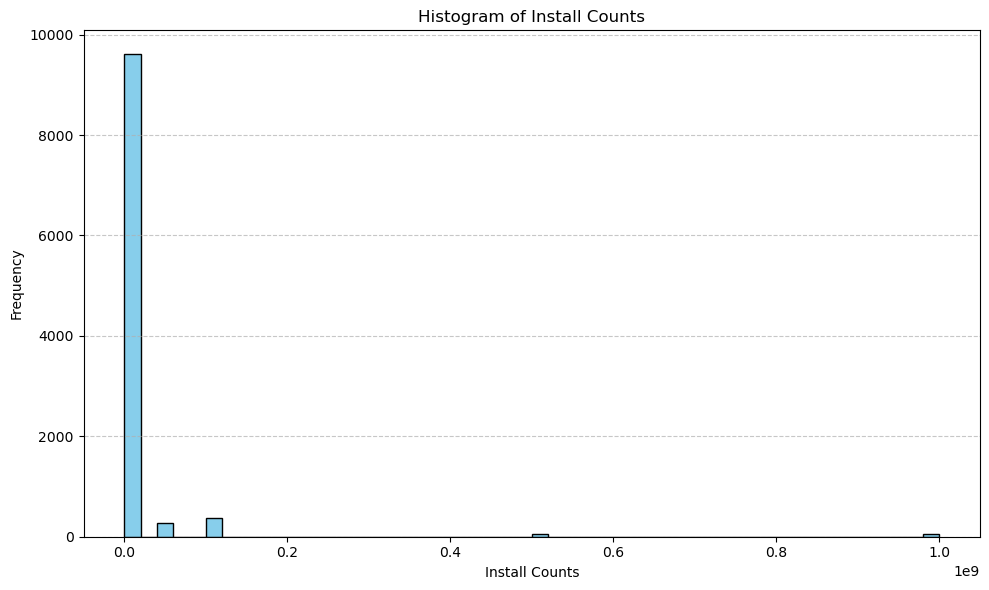

In [37]:
# Plotting a normal distribution 

plt.figure(figsize=(10, 6))
plt.hist(x=data2['Installs'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Install Counts')
plt.ylabel('Frequency')
plt.title('Histogram of Install Counts')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [38]:
data2

,App,Category,Rating,Reviews,Size(KB),Installs,Type,Price,Content Rating,Genres,Last Updated,bin_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",Low
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",Low
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",Low
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Low
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",Low
...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,54272.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",Low
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3686.4,100,Free,0.0,Everyone,Education,"July 6, 2018",Low
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9728.0,1000,Free,0.0,Everyone,Medical,"January 20, 2017",Low
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,12288.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Low


Since the column is not normally distributed, we used quatiles to segment the data into low,medium,high and very high bins.

In [39]:
# Define the quantiles
quantiles = [0, 0.25, 0.5, 0.75, 1]

# Compute the quantiles of the 'InstallsTest' column
install_quantiles = data2['Installs'].quantile(quantiles)

# Define the labels for the quantiles
labels = ['Low', 'Medium', 'High', 'Very High']

# Add a new column indicating the quantile category
data2['InstallCategory'] = pd.cut(data2['Installs'], bins=install_quantiles, labels=labels, include_lowest=True)

# Print the value counts for each category
print(data2['InstallCategory'].value_counts())

InstallCategory
Medium       3105
Low          2681
Very High    2566
High         2005
Name: count, dtype: int64


In [40]:
data2.head(5)

,App,Category,Rating,Reviews,Size(KB),Installs,Type,Price,Content Rating,Genres,Last Updated,bin_category,InstallCategory
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",Low,Medium
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",Low,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",Low,Very High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Low,Very High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",Low,Medium


## EDA

In [41]:
data2.head()

,App,Category,Rating,Reviews,Size(KB),Installs,Type,Price,Content Rating,Genres,Last Updated,bin_category,InstallCategory
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",Low,Medium
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",Low,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",Low,Very High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Low,Very High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",Low,Medium


Testing for Correlation using Installs

<Axes: >

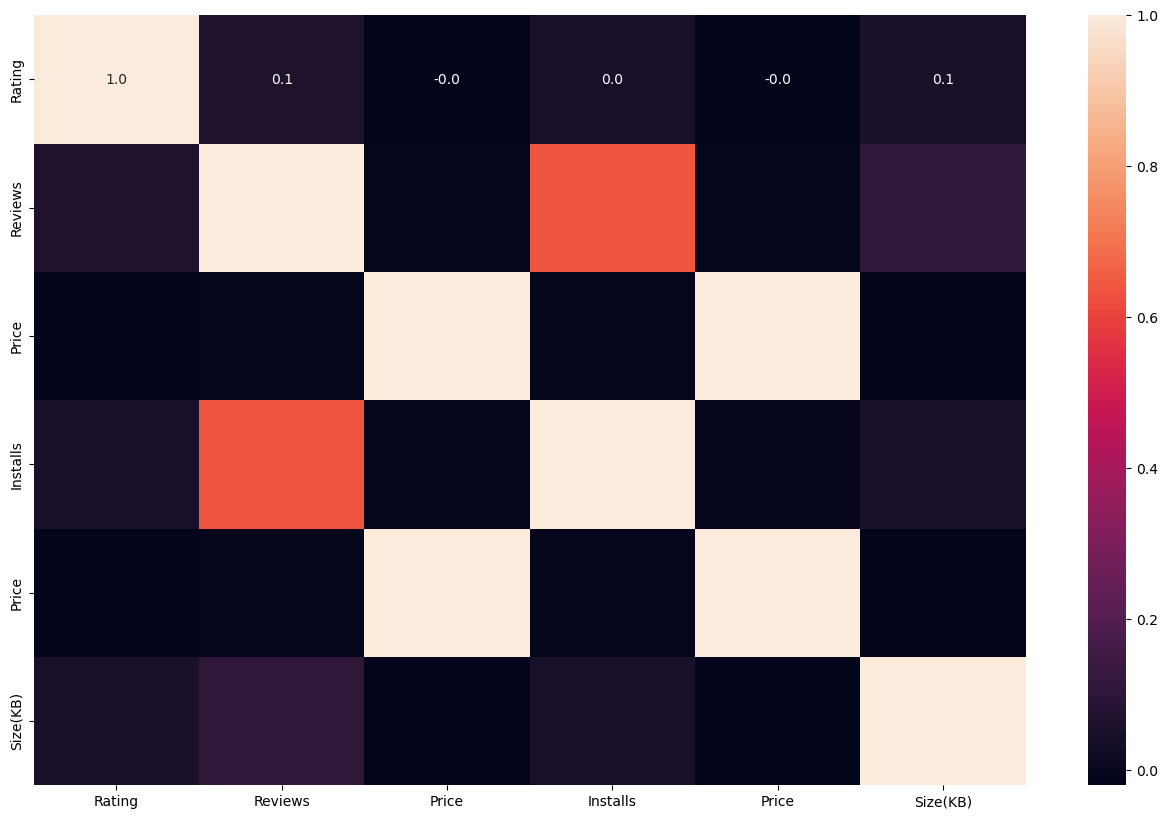

In [42]:
plt.figure(figsize=(16,10))
numeric_cols = ['Rating', 'Reviews',  'Price', 'Installs', 'Price', 'Size(KB)']
sns.heatmap(data2[numeric_cols].corr(),annot=True,fmt = ".1f")

Plotting Counts of Categories

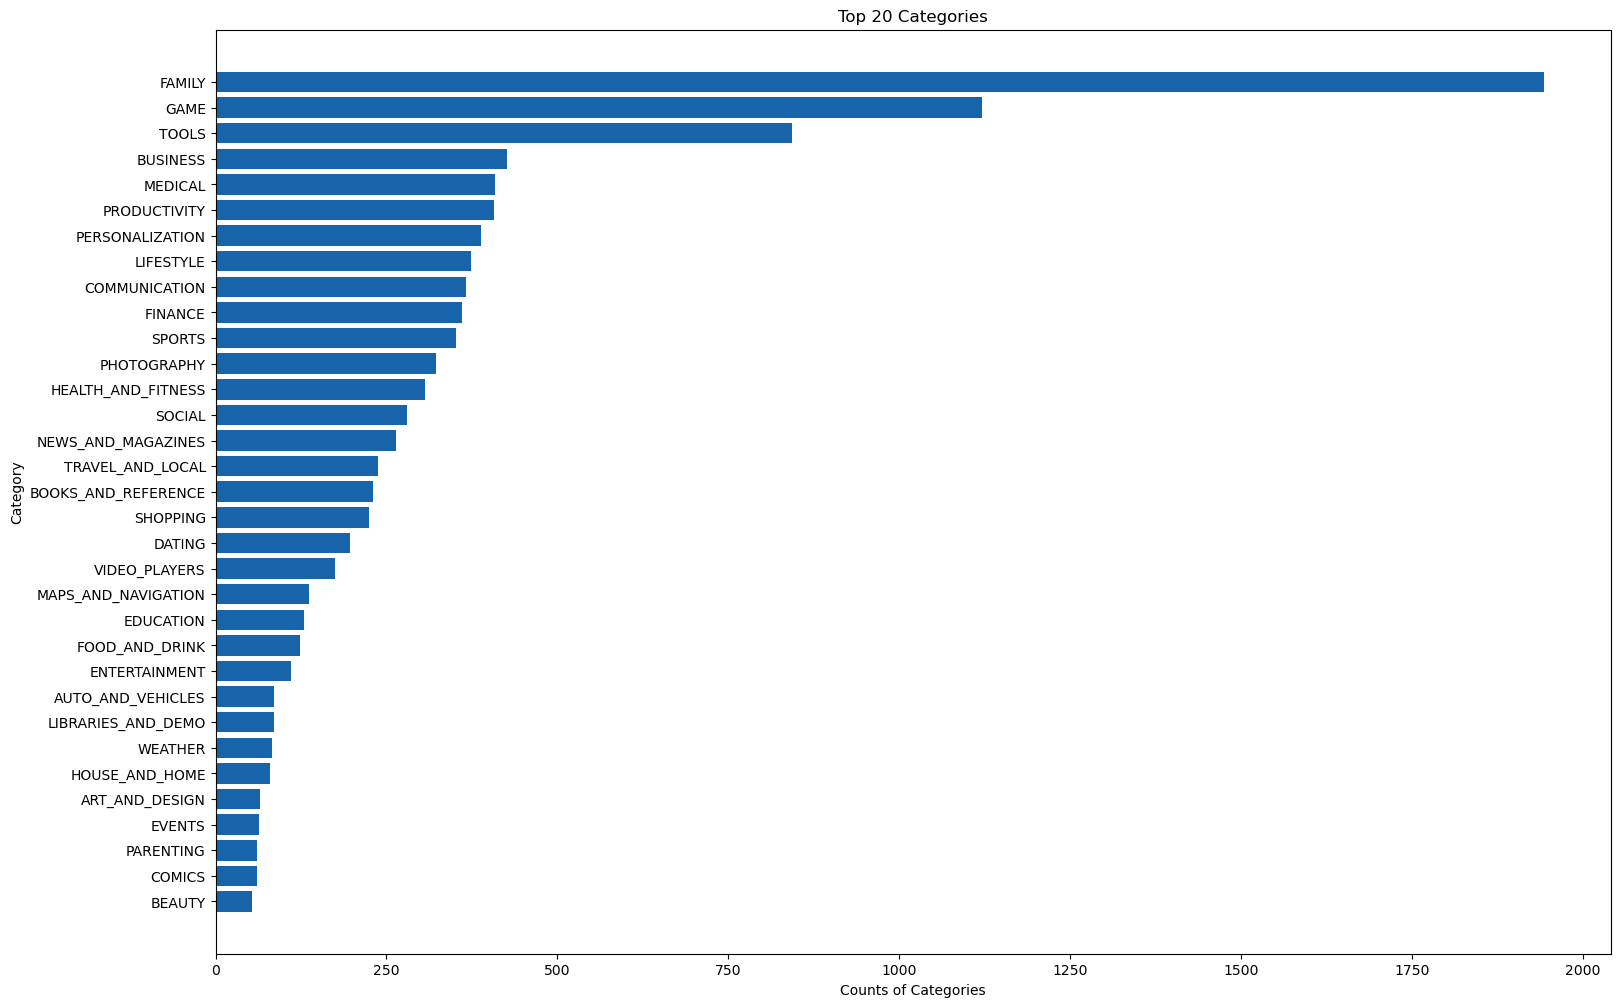

In [43]:
# Fetching top 20 categories
top_20_categories = data2['Category'].value_counts()

# Reverse the order of categories
top_20_categories = top_20_categories[::-1]

plt.figure(figsize=(18, 12))
plt.barh(top_20_categories.index, top_20_categories.values, color=plt.cm.Blues(0.8))
plt.xlabel('Counts of Categories')
plt.ylabel('Category')
plt.title('Top 20 Categories')
plt.show()


Catergory Family has most application as well as category game then tools.

### Which category has the highest number of installs?

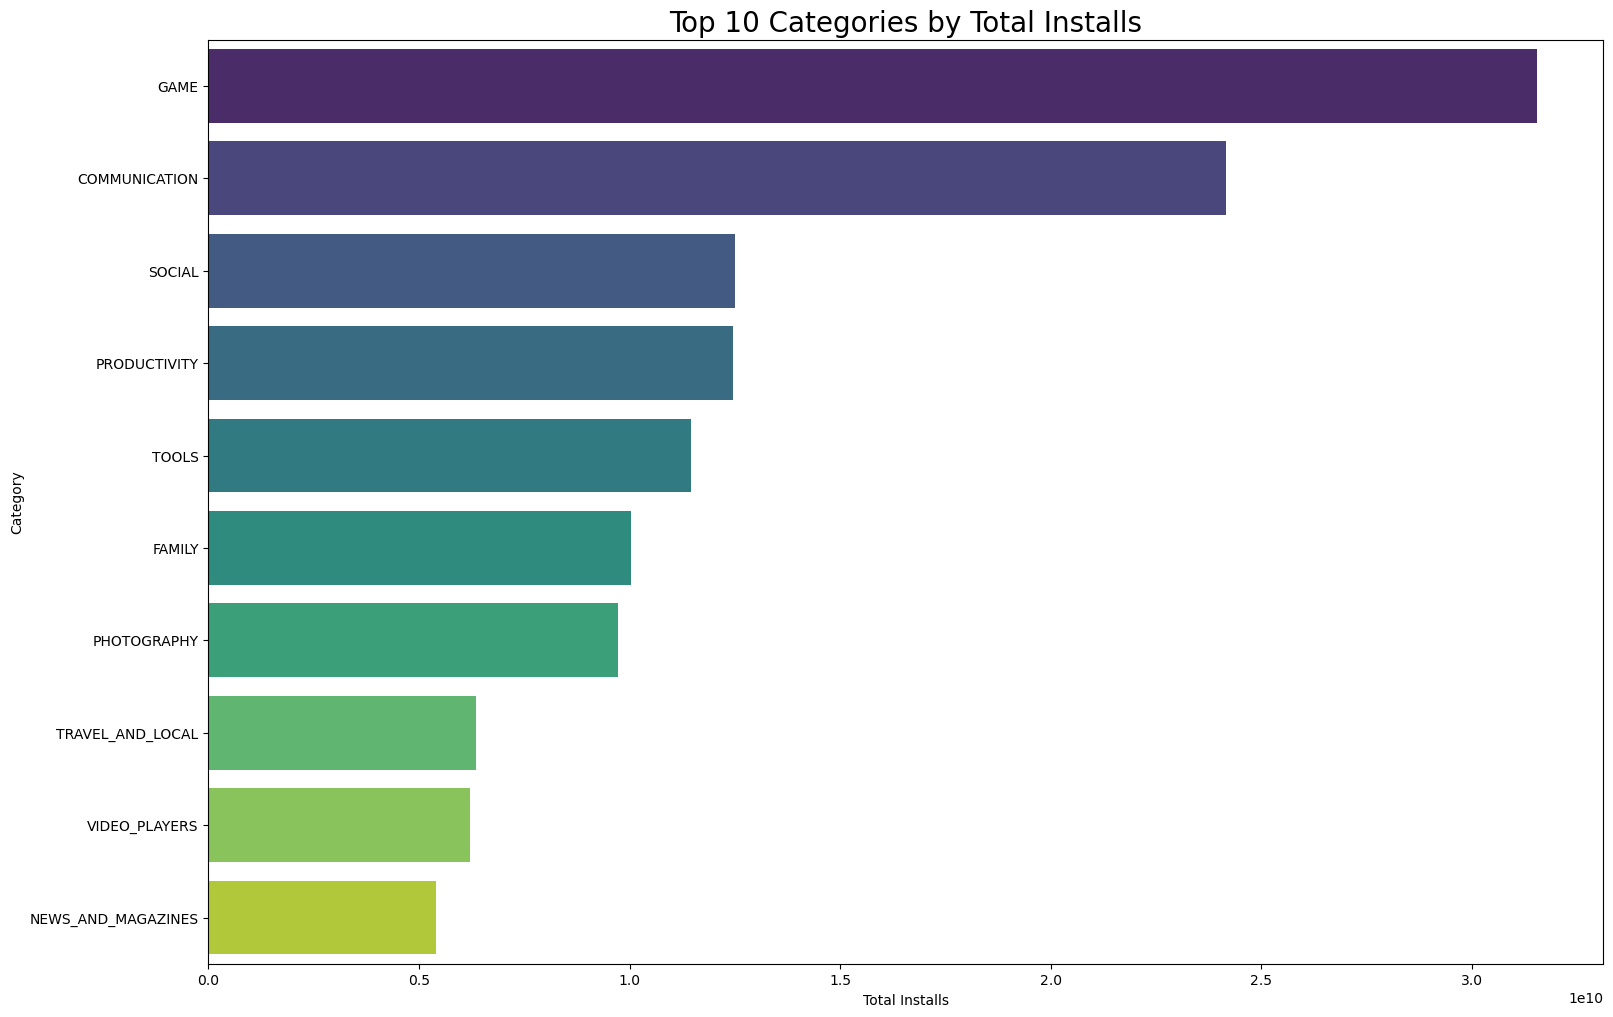

In [44]:
# Grouping Category and Installs
category_highest_installs = data2.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

# Create a horizontal bar plot
plt.figure(figsize=(18, 12))
sns.barplot(x=category_highest_installs.values, y=category_highest_installs.index, palette="viridis")
plt.title("Top 10 Categories by Total Installs", size=20)
plt.xlabel("Total Installs")
plt.ylabel("Category")
plt.show()


From the above plot Game Category has the most number of Installs.

Which category has the highest number of reviews

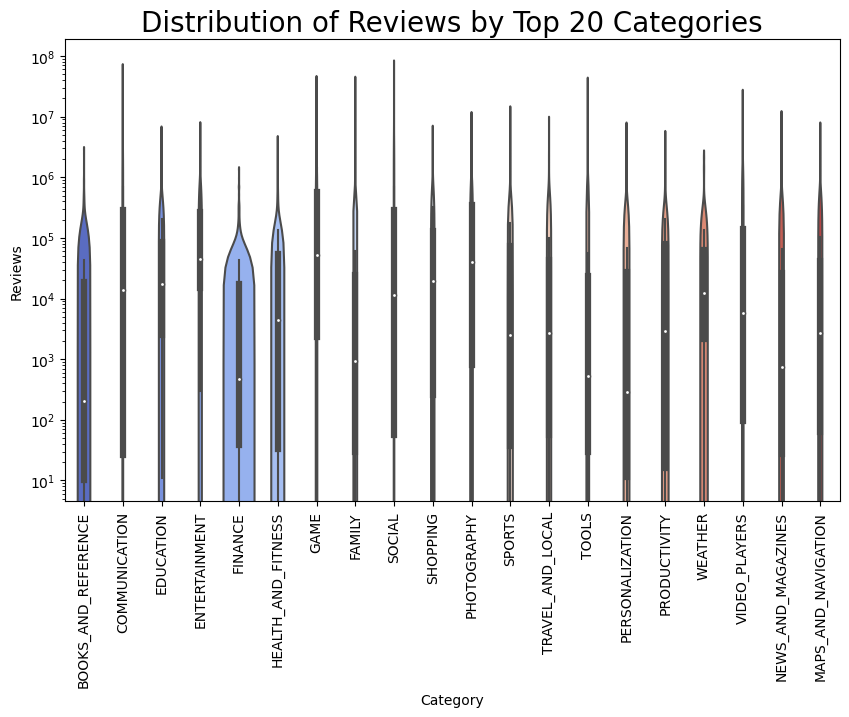

In [45]:
# Calculate the sum of reviews for each category
category_reviews = data2.groupby('Category')['Reviews'].sum()

# Sort the categories based on the sum of reviews and select the top 20
top_categories = category_reviews.sort_values(ascending=False).head(20).index

# Filter the data to include only the top 20 categories
data_top20 = data2[data2['Category'].isin(top_categories)]

# Plot the violin plot for the top 20 categories
plt.figure(figsize=(10, 6))
sns.violinplot(x='Category', y='Reviews', data=data_top20, palette="coolwarm")
plt.title("Distribution of Reviews by Top 20 Categories", size=20)
plt.xlabel("Category")
plt.ylabel("Reviews")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.yscale("log")  # Use log scale for better visualization as it compresses the data.
plt.show()

The violin plot indicate that finance had the highest number of reviews followed by books and references then health and fitnesss.

How does Installs relate to Ratings?

Text(0.5, 1.0, 'Rating VS Installs')

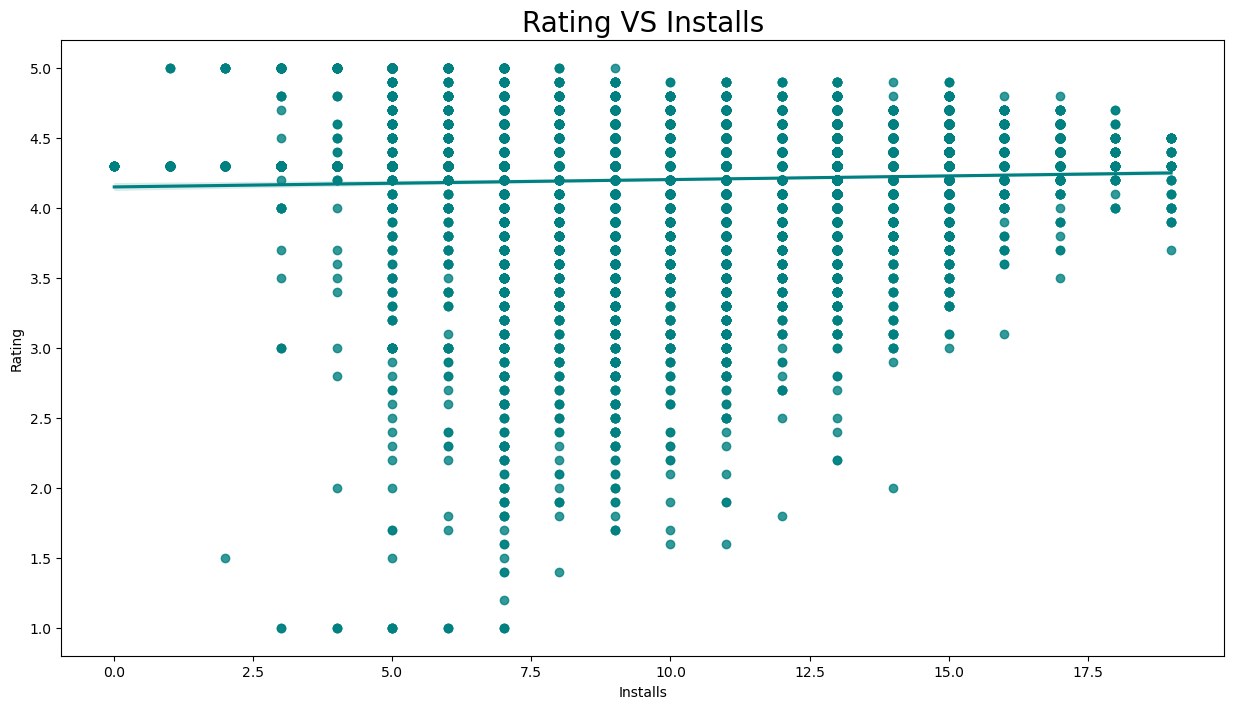

In [46]:
Sorted_value = sorted(list(data2['Installs'].unique()))
data2['Installs'].replace(Sorted_value,range(0,len(Sorted_value),1), inplace = True )

plt.figure(figsize = (15,8))
sns.regplot(x="Installs", y="Rating", color = 'teal',data=data2);
plt.title('Rating VS Installs',size = 20)

We note that ratings increase as the number of Installs increases.

### Plotting Categories with both highest and lowest ratings

In [47]:
data2.dtypes

App                  object
Category             object
Rating              float64
Reviews               int64
Size(KB)            float64
Installs              int64
Type                 object
Price               float64
Content Rating       object
Genres               object
Last Updated         object
bin_category       category
InstallCategory    category
dtype: object

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3528\621131443.py:1: FutureWarning: The provided callable <function mean at 0x000001B797DC79C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  result = data2.groupby(["Category"])['Rating'].aggregate(np.mean).reset_index().sort_values('Rating')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3528\621131443.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=data2.Category, y=data2.Rating,ci=None,order=result['Category'])


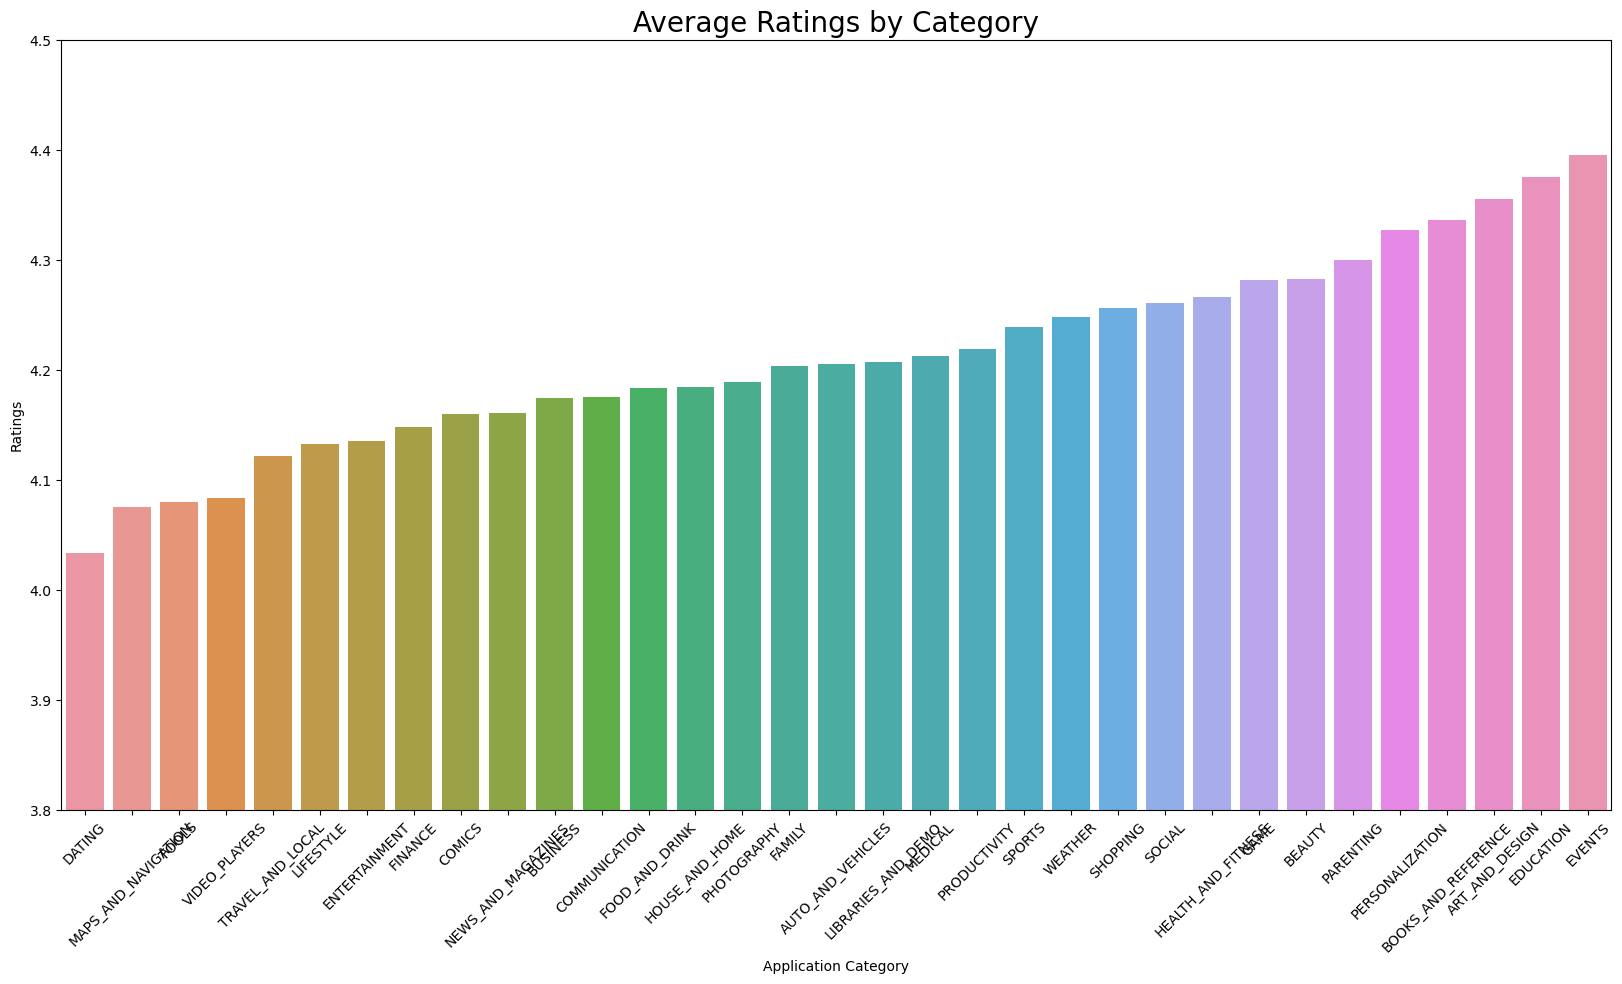

In [48]:
result = data2.groupby(["Category"])['Rating'].aggregate(np.mean).reset_index().sort_values('Rating')

plt.figure(figsize=(20,10))
sns.barplot(x=data2.Category, y=data2.Rating,ci=None,order=result['Category'])

plt.xticks(rotation = 45)
plt.ylim(3.8,4.5)
plt.xlabel('Application Category')
plt.ylabel('Ratings')
plt.title('Average Ratings by Category',size=20)
plt.show()

Events had the highest rating and dating the lowest.

### Bar Graph showing top 10 highest rated and lowest rated apps

Not sure of the plot below cause of the y-scale

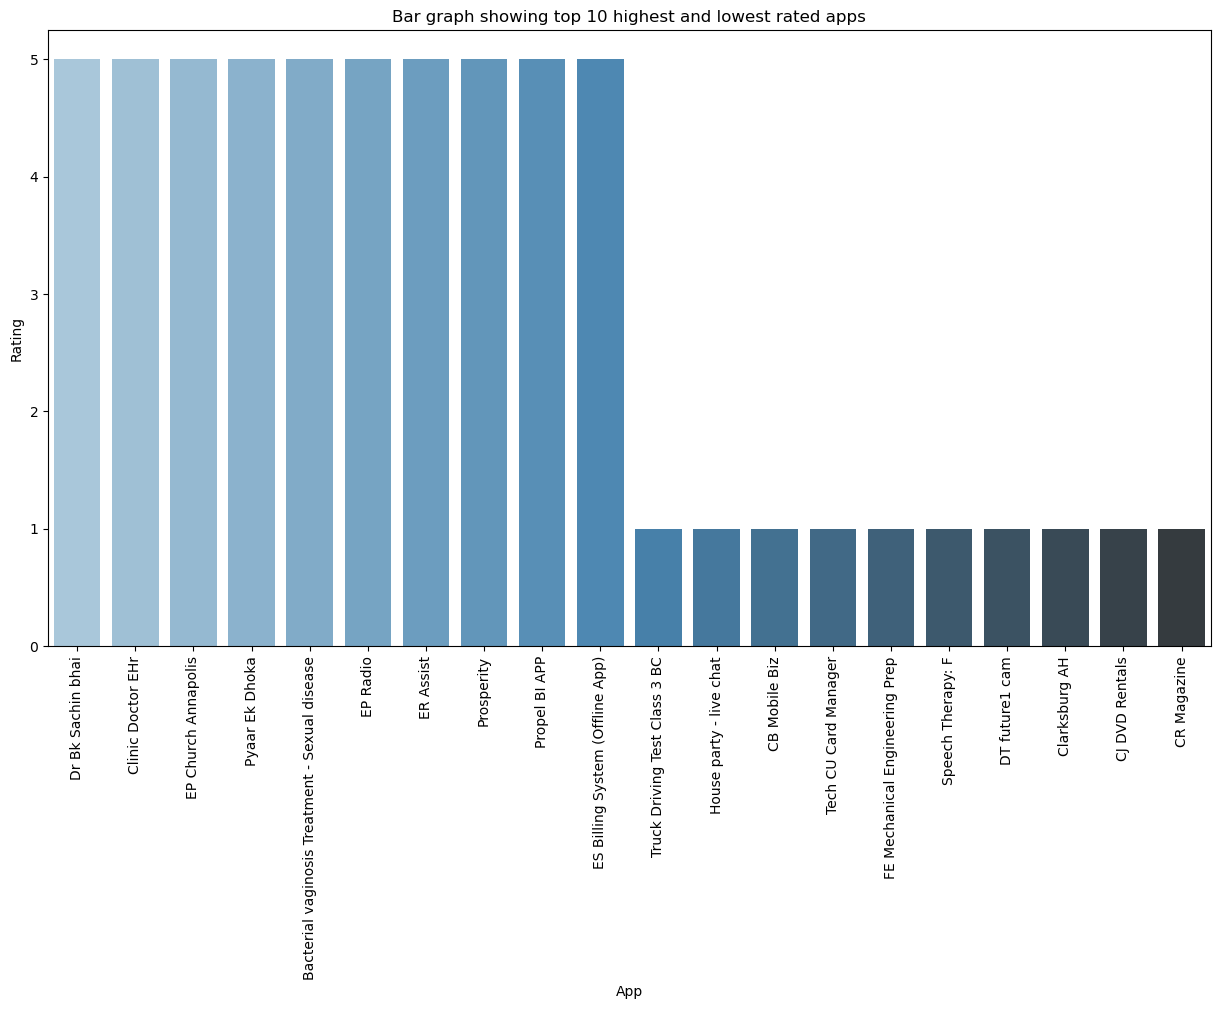

In [49]:
# Group by 'App' and calculate the mean rating for each app
app_ratings = data2.groupby('App')['Rating'].mean().reset_index()

# Sort by rating in descending order to get top 10 highest rated apps
top_10 = app_ratings.sort_values(by='Rating', ascending=False).head(10)

# Sort by rating in ascending order to get top 10 lowest rated apps
bottom_10 = app_ratings.sort_values(by='Rating', ascending=True).head(10)

# Concatenate the top and bottom 10 rated apps
df = pd.concat([top_10, bottom_10])

# Plot the bar graph
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
plt.title('Bar graph showing top 10 highest and lowest rated apps')
sns.barplot(data=df, x='App', y='Rating', palette='Blues_d', orient='v')
plt.show()


We noted that the highest rated apps got 5 while the lowest ranged below 1. 

To do:

To add more context of the category these  apps belong in.

### Visualizing the sizes of apps

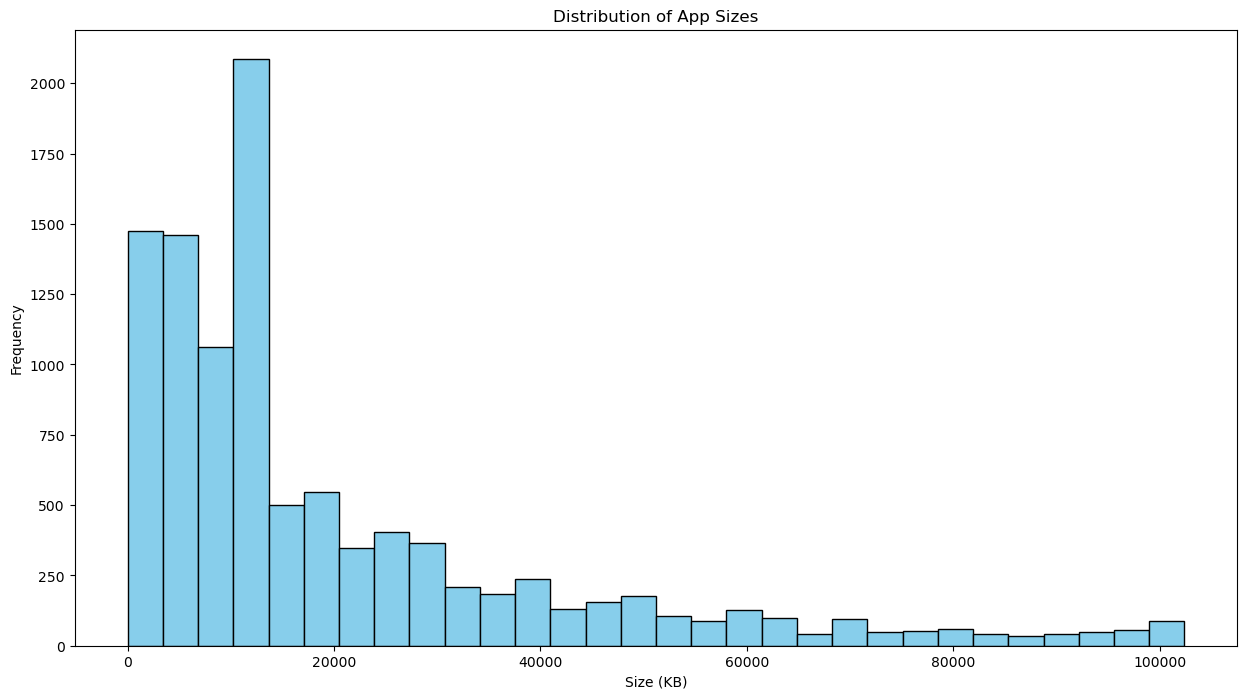

In [50]:
# Histogram showing Sizes of the Apps

plt.figure(figsize=(15, 8))
plt.hist(data2['Size(KB)'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Size (KB)')
plt.ylabel('Frequency')
plt.title('Distribution of App Sizes')
plt.show()

Most of the apps developed ranged from 0-20000 KB.

### Visualizing the App Types

In [51]:
data2['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [52]:
data2['Type'].value_counts()

Type
Free    9592
Paid     765
Name: count, dtype: int64

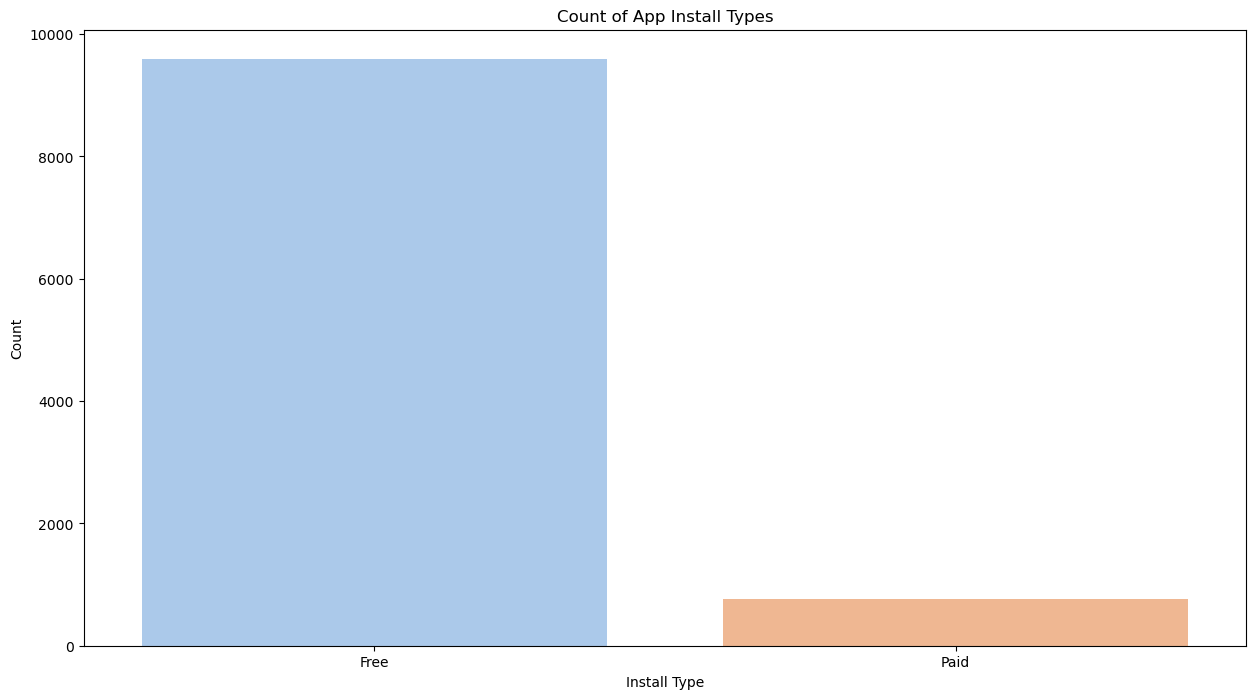

In [53]:
# Count of the types of installs

plt.figure(figsize=(15, 8))
sns.countplot(data=data2, x='Type', palette='pastel')
plt.xlabel('Install Type')
plt.ylabel('Count')
plt.title('Count of App Install Types')
plt.show()

### Visualizing the app type using a Pie Chart

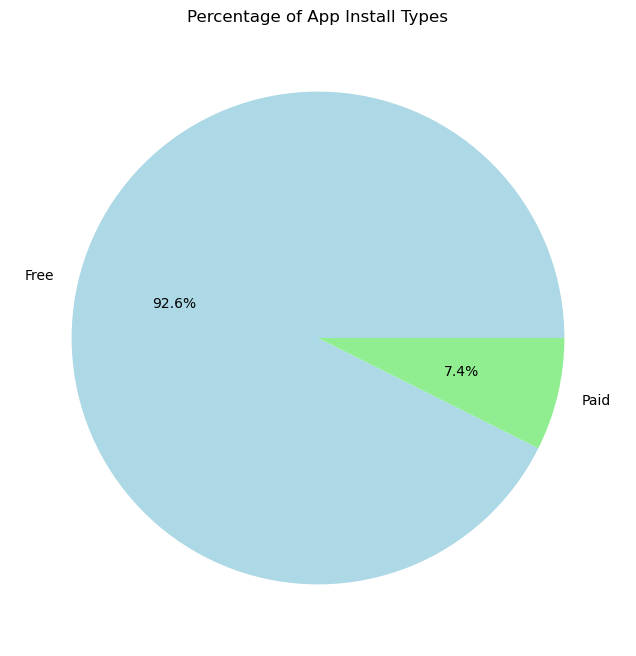

In [54]:
# Pie chart showing percentages of types

type_counts = data2['Type'].value_counts()
plt.figure(figsize=(15, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Percentage of App Install Types')
plt.show()

From the above plot we can see most apps are Free

### Plotting Average App Size by Type of Install

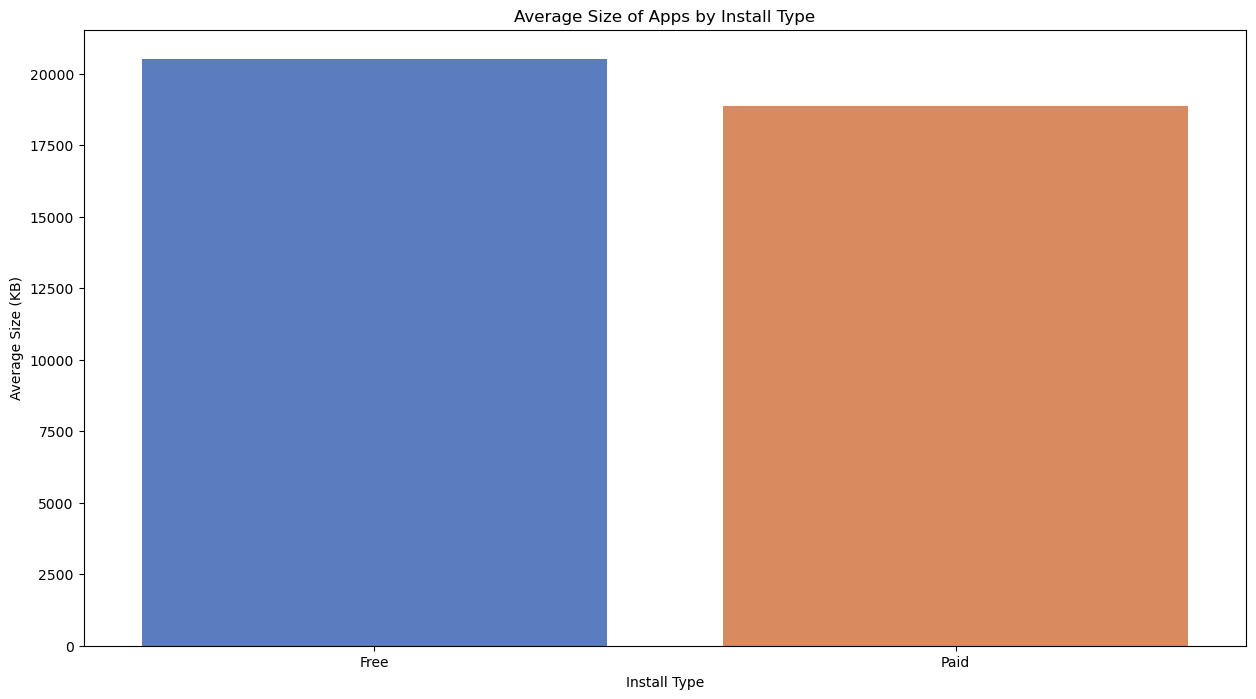

In [55]:
# Bar Plot showing average app size by type of install

avg_size_by_type = data2.groupby('Type')['Size(KB)'].mean().reset_index()
plt.figure(figsize=(15, 8))
sns.barplot(data=avg_size_by_type, x='Type', y='Size(KB)', palette='muted')
plt.xlabel('Install Type')
plt.ylabel('Average Size (KB)')
plt.title('Average Size of Apps by Install Type')
plt.show()

The average size of free apps was higher than the paid ones.

### Visualizing Average Rating by Type

Average Rating for Free Apps: 4.198519599666389
Average Rating for Paid Apps: 4.269150326797385


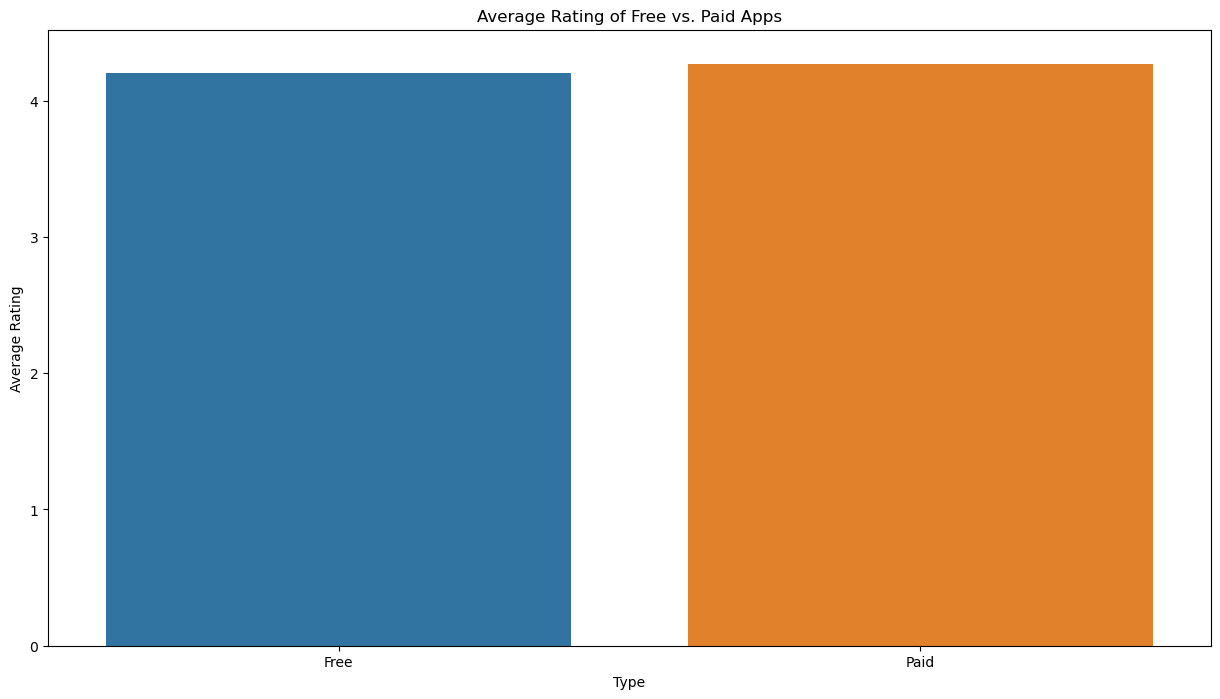

In [56]:
# Calculate average rating by Type
average_rating_by_type = data2.groupby('Type')['Rating'].mean()

# Print the average rating for Free and Paid apps
print("Average Rating for Free Apps:", average_rating_by_type['Free'])
print("Average Rating for Paid Apps:", average_rating_by_type['Paid'])

# visualizing the average rating for the types of installs
plt.figure(figsize=(15, 8))
sns.barplot(data=data2, x='Type', y='Rating', errwidth=0)
plt.title('Average Rating of Free vs. Paid Apps')
plt.xlabel('Type')
plt.ylabel('Average Rating')
plt.show()

We note that paid apps were rated higher.

### Visualizing average app size by category

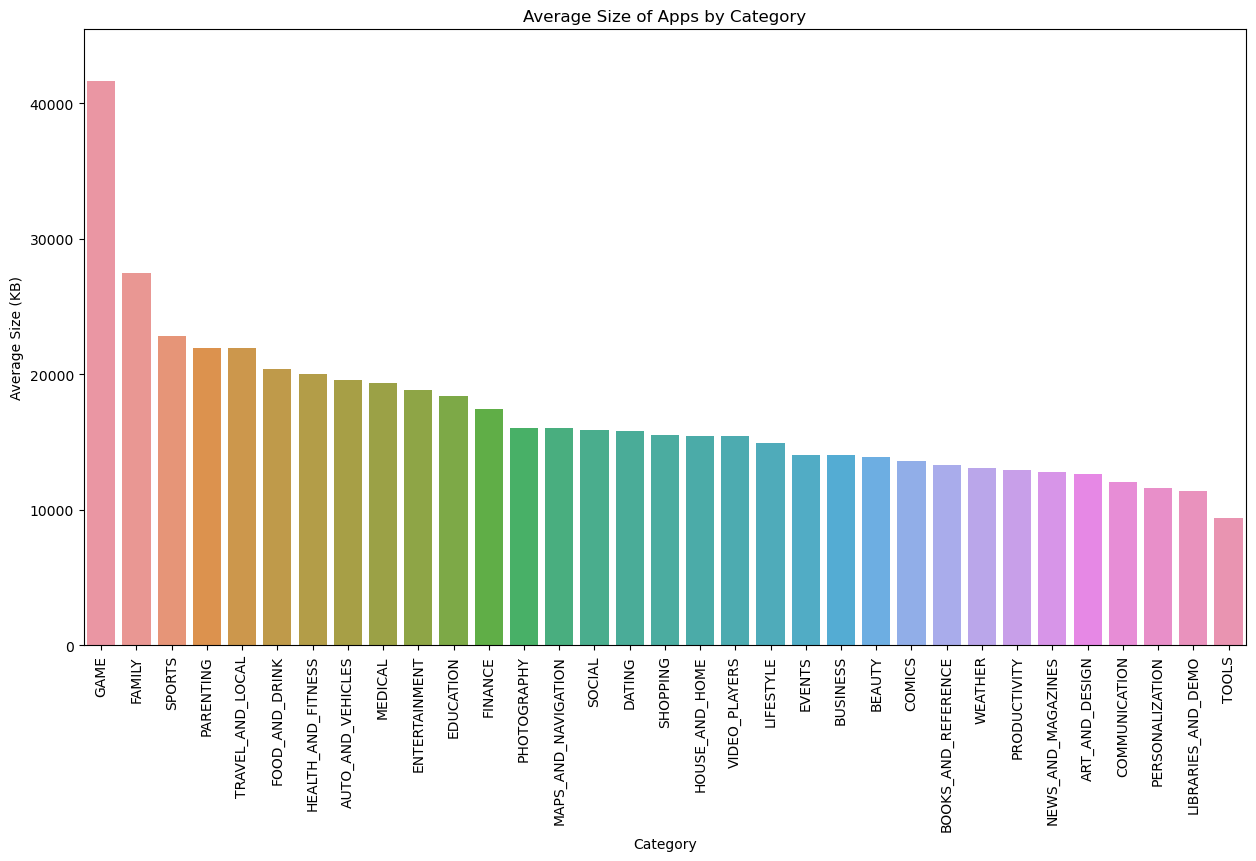

In [57]:
# Visualizing the average size of apps by category

plt.figure(figsize=(15, 8))
sns.barplot(data=data2, x='Category', y='Size(KB)', errwidth=0,
           order=data2.groupby('Category')['Size(KB)'].mean().sort_values(ascending=False).index)
plt.title('Average Size of Apps by Category')
plt.xlabel('Category')
plt.ylabel('Average Size (KB)')
plt.xticks(rotation=90)
plt.show()

Game, family and sports category had tthe highest average size while tools had the lowest.

### Plotting the correlation of the top 5 categories

In [58]:
data2.dtypes

App                  object
Category             object
Rating              float64
Reviews               int64
Size(KB)            float64
Installs              int64
Type                 object
Price               float64
Content Rating       object
Genres               object
Last Updated         object
bin_category       category
InstallCategory    category
dtype: object

Correlation for Top 5 Categories


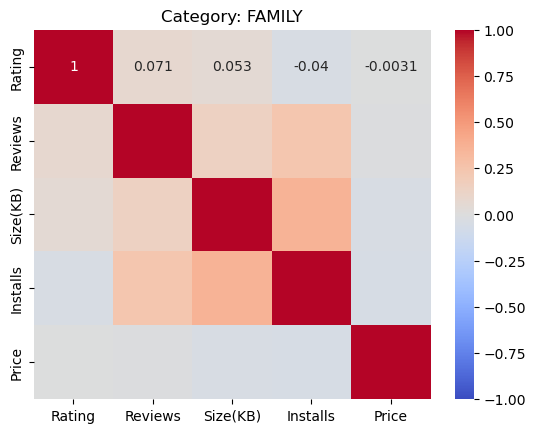

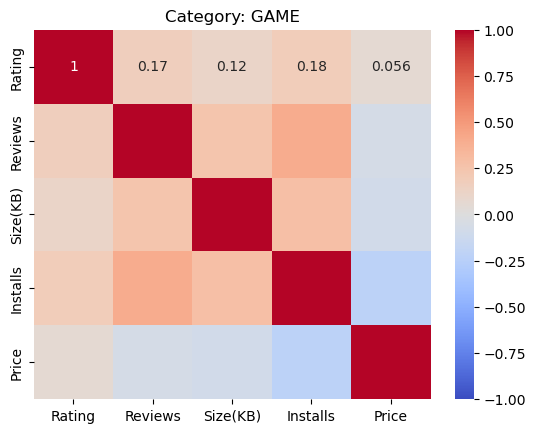

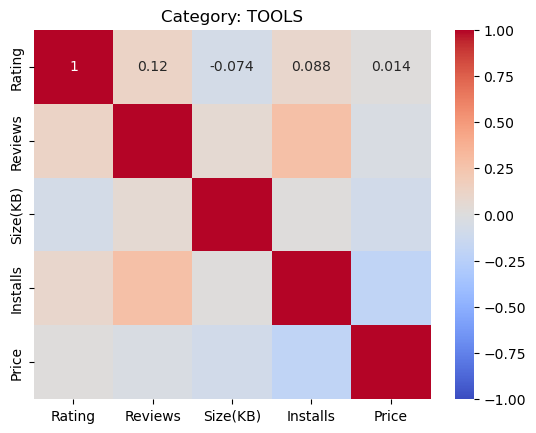

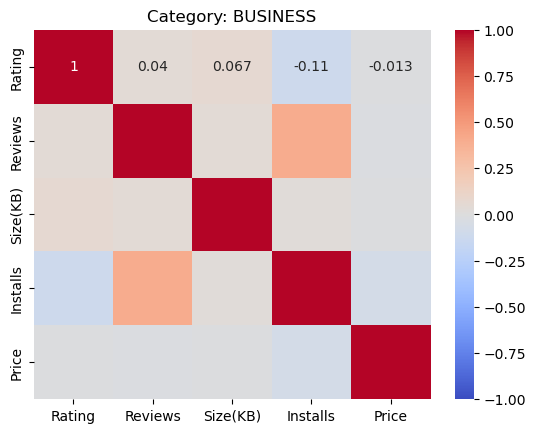

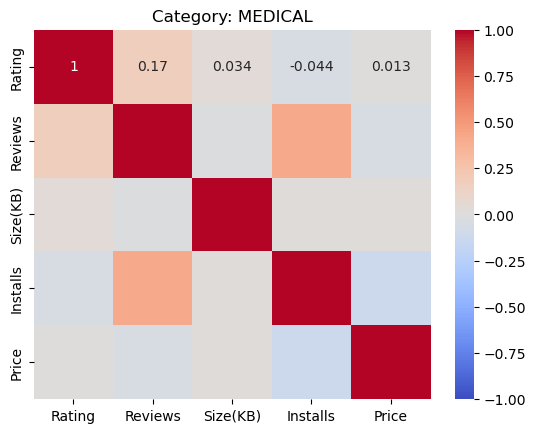

In [59]:
# Correlation for Top 5 Categories
print('Correlation for Top 5 Categories')
a = data2['Category'].value_counts().index.unique()
top_5 = a[:5]
for x in top_5:
    # Select numeric columns for the current category
    numeric_data2 = data2[data2['Category'] == x].select_dtypes(include=['float64', 'int64'])
    
    # Plot correlation matrix
    plt.figure()
    sns.heatmap(numeric_data2.corr(),
                vmin=-1,
                cmap='coolwarm',
                annot=True).set_title('Category: '+x)

###Add commentary

### Pie Chart for content rating column

<Axes: ylabel='count'>

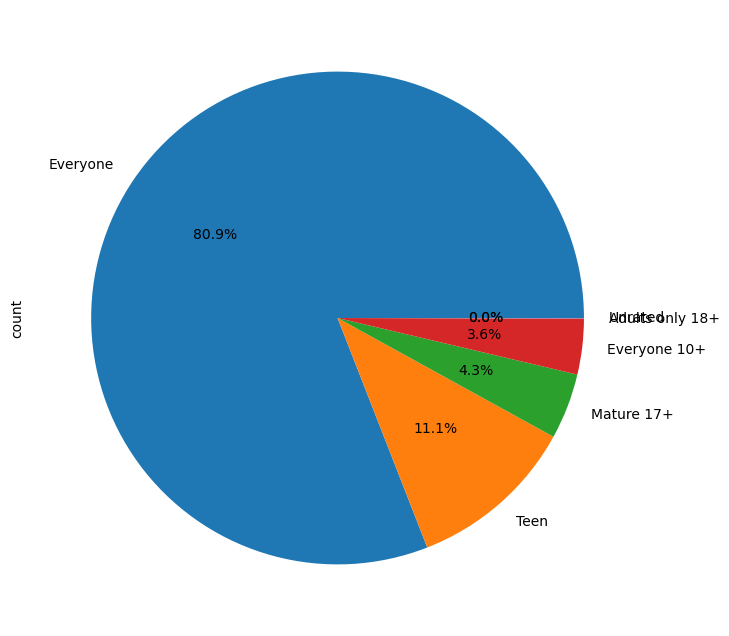

In [60]:
data2['Content Rating'].value_counts().plot(kind='pie',figsize=(8,8), autopct='%1.1f%%')


Most of the apps developed were rated for everyone at 80.9% while adult only  had the least.

### Stacked Bar Chart for Content Rating of App Categories

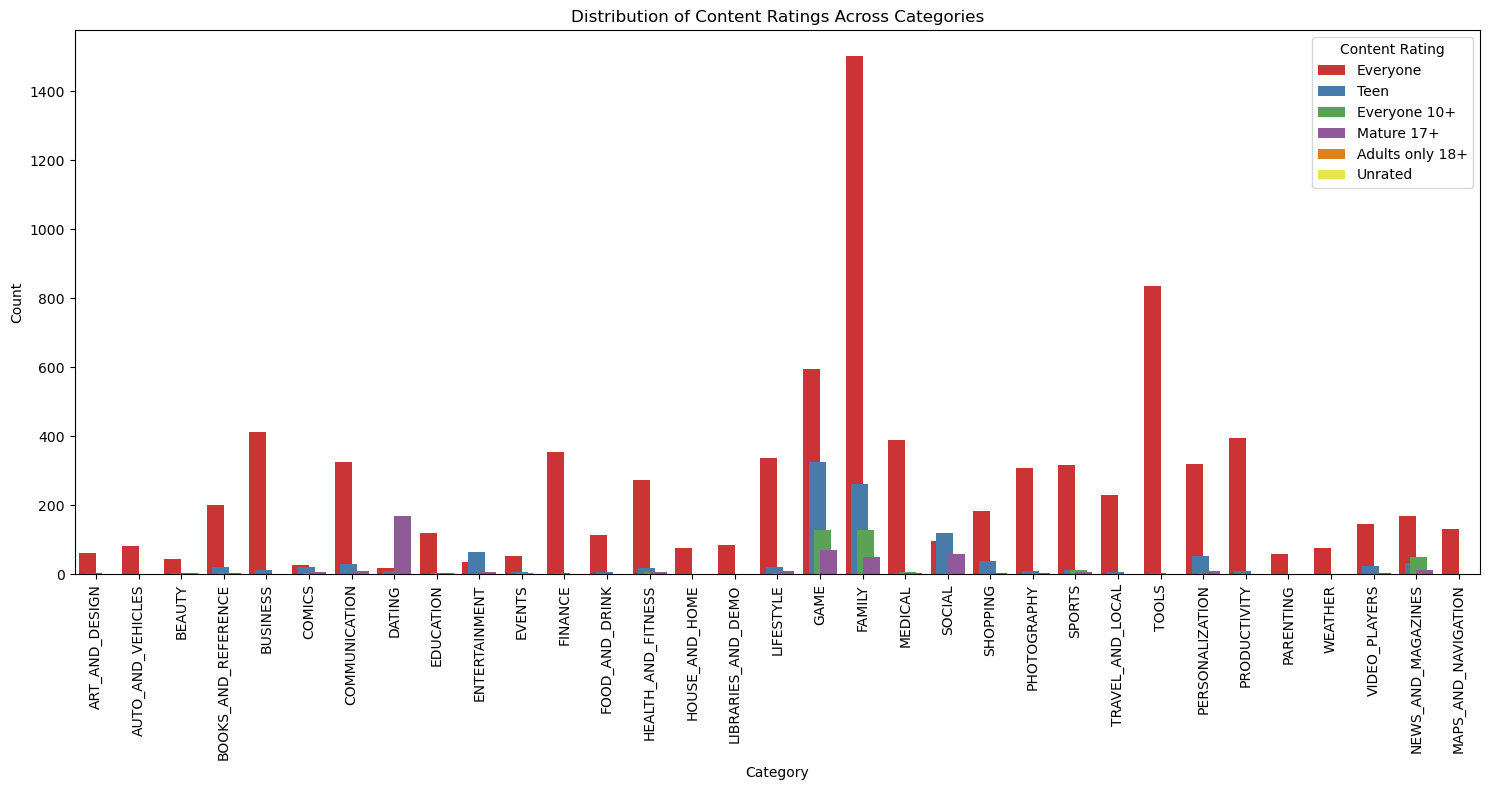

In [61]:
plt.figure(figsize=(15, 8))
sns.countplot(data=data2, x='Category', hue='Content Rating', palette='Set1')
plt.xticks(rotation=90)
plt.title('Distribution of Content Ratings Across Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Content Rating')

# The line below is for adjusting the width of the bars so that they're not too thin
for patch in plt.gca().patches:
    patch.set_width(0.4)

plt.tight_layout()
plt.show()


The category that had the highest content rating was family,tools and game.

### Scatter plot for Reviews and Price

Not sure on whether they are the same or they are achieving the same purpose

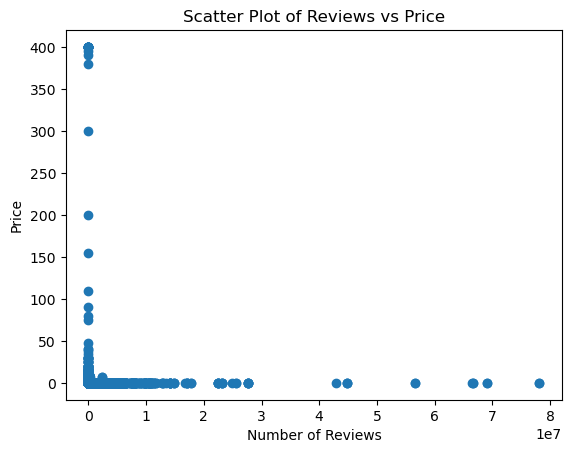

In [62]:
plt.scatter(data2["Reviews"], data2["Price"])
plt.xlabel("Number of Reviews")
plt.ylabel("Price")
plt.title("Scatter Plot of Reviews vs Price")
plt.show()

It is evident that the paid apps had theh least number of reviews.